In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_ht = pd.read_csv('C:/Users/he125/OneDrive/바탕 화면/Dev/Git/py_machineLearning/Assignment_Group/ML_group_project/hotel_bookings.csv')

In [5]:
#전처리 제안 : 몇가지 EDA를 위해 resort hotel과 city hotel을 분리
df_ht = pd.read_csv('C:/Users/he125/OneDrive/바탕 화면/Dev/Git/py_machineLearning/Assignment_Group/ML_group_project/hotel_bookings.csv')

df_ht['hotel'].value_counts()

df_ch = df_ht[df_ht['hotel'] == 'City Hotel']
df_rh = df_ht[df_ht['hotel'] == 'Resort Hotel']

print(df_ch['hotel'].value_counts(),df_rh['hotel'].value_counts())


City Hotel    79330
Name: hotel, dtype: int64 Resort Hotel    40060
Name: hotel, dtype: int64


In [6]:
df_ht.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype=object)

In [7]:
df_ht.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 기초 탐색

In [9]:
df_ht['babies'].value_counts()
# babies 컬럼은 큰 의미가 없어보인다.

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [10]:
df_ht['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [11]:
df_ht['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [12]:
df_ht['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [13]:
df_ht['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [14]:
df_ht['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

# Length of Stay
리조트 호텔과 시티 호텔에서 각각 사람들이 얼마나 머물렀는지, 머무른 날의 수에 따른 관측치 분포를 살펴본다.

C:\Users\he125\AppData\Local\Temp\ipykernel_1380\3151833256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rh["total_nights"] = df_rh["stays_in_weekend_nights"] + df_rh["stays_in_week_nights"]
C:\Users\he125\AppData\Local\Temp\ipykernel_1380\3151833256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch["total_nights"] = df_ch["stays_in_weekend_nights"] + df_ch["stays_in_week_nights"]


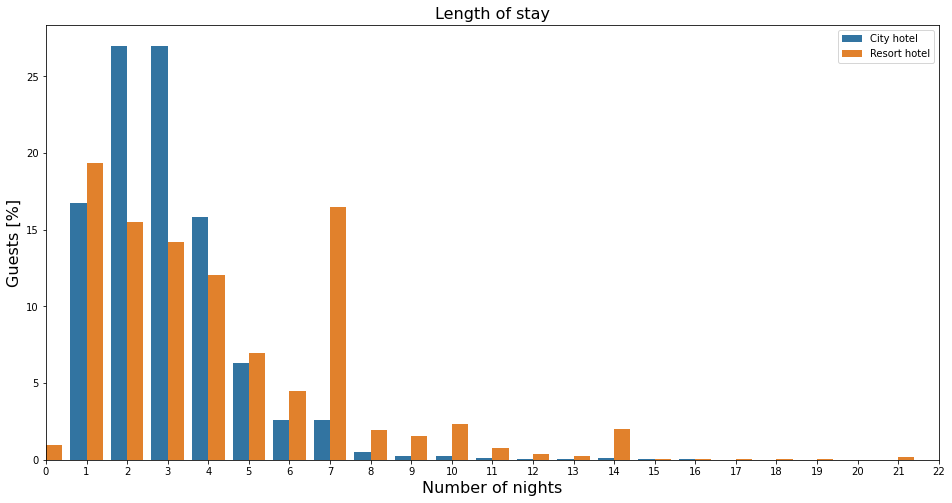

,hotel,num_nights,rel_num_bookings
0,Resort hotel,1,19.340989
1,Resort hotel,7,16.465302
2,Resort hotel,2,15.519221
3,Resort hotel,3,14.216176
4,Resort hotel,4,12.046930
...,...,...,...
71,City hotel,48,0.001261
72,City hotel,49,0.001261
73,City hotel,57,0.001261
74,City hotel,34,0.001261


In [15]:
# Create a DateFrame with the relevant data:
df_rh["total_nights"] = df_rh["stays_in_weekend_nights"] + df_rh["stays_in_week_nights"]
df_ch["total_nights"] = df_ch["stays_in_weekend_nights"] + df_ch["stays_in_week_nights"]


num_nights_res = list(df_rh["total_nights"].value_counts().index)
num_bookings_res = list(df_rh["total_nights"].value_counts())
rel_bookings_res = df_rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(df_ch["total_nights"].value_counts().index)
num_bookings_cty = list(df_ch["total_nights"].value_counts())
rel_bookings_cty = df_ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)


#Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

nights_data

### Suggestion : 
플롯에서 살펴보면, 시티 호텔에선 1일~4일의 숙박기간 사이에 많은 관측값이 분포해있고,
리조트 호텔의 경우 시티호텔과 전체적으로 유사하나, 시티호텔보다는 꼬리쪽 분포가 높게 형성돼 있다.

리조트 호텔은 무엇보다도 7일 동안 머무른 관측값의 수가 유의미하게 높다는 점에서 시티호텔과 큰 차이를 보이는데,
이는 리조트 호텔이 시티 호텔에 비해 비교적 접근성이 낮기 때문에, 긴 휴가기간을 확보한 고객이 많이 찾는 것으로 보인다. Vice versa.

우리는 City hotel의 주 고객층을 1일~4일을 머무르는 고객을 주 타겟으로 설정하여 promotion을 기획할 수 있을 것이며
반대로, Resort hotel의 주 고객층 중 일주일 이상을 머무르는 고객을 타겟으로 promotion을 기획해볼 수 있다.


해당 분석의 결과에서 더 나아가, 시티 호텔과 리조트 호텔 각각에서
내국인과 외국인 고객의 투숙기간 분포와 비율을 분석하여 내/외국 고객 각각에 적절한 프로모션을 제공하기 위한 인사이트를 정교화 하고자 한다.

구체적으로 시티/리조트로 분할하여
4일 이하로 투숙한 투숙객의 내/외국인 게스트의 비율과, 4일을 초과하여 투숙한 케이스 각각에 대해
내/외국인 게스트의 비율을 구한 후, 전체 내/외국인 게스트 비율과 비교하여 
프로모션을 위한 인사이트를 정교하고자 한다.
<br><br><br><br>

In [16]:

# 전체 고객 중 [ 자국(포르투갈) 고객 : 국외 고객 ] 비율을 살펴본다
count_PRT = int(df_ht[df_ht['country'] == 'PRT' ]['country'].value_counts().values)
count_foreign = df_ht[df_ht['country'] != 'PRT']['country'].value_counts().sum()

total_count = count_PRT+count_foreign

per_count_PRT = (count_PRT / total_count) * 100
per_count_foreign = (count_foreign / total_count) * 100

per_count_PRT = round(per_count_PRT, ndigits=2)
per_count_foreign = round(per_count_foreign, ndigits=2)

print('Percentage of portuguese Guests : ',per_count_PRT)
print('Percentage of foreign Guests : ',per_count_foreign)

Percentage of portuguese Guests :  40.87
Percentage of foreign Guests :  59.13


총 투숙객 관측값에서 내/외국인은 아래와 같은 비율을 차지한다.
- 포르투갈 게스트는 40.87 퍼센트
- 외국인 게스트는 59.13 퍼센트

<br><br>
  


### **(1) 리조트 호텔에 4일 이하 머문 고객들의 국가분포와 내외국인 비율**

In [17]:
# 리조트 호텔에 4일 이하 머문 고객들의 국가분포와 내외국인 비율을 살펴보았다.
rh_stay_under5 = df_rh[df_rh['total_nights'] < 5]['country']

print(rh_stay_under5.value_counts()[0:5],'\n')
    # 1등 포르투갈
    # 2등 영국 
    # 3등 아일랜드
    # 4등 이후 프랑스, 독일, 영국, 브라질, 이탈리아, ..etc 
    

#비율
rh_stay_U5_PRT = int(rh_stay_under5[rh_stay_under5 == 'PRT'].value_counts().values)
rh_stay_U5_foreign = rh_stay_under5[rh_stay_under5 != 'PRT'].value_counts().sum()

rh_stay_U5_total = rh_stay_U5_PRT + rh_stay_U5_foreign

per_rh_stay_U5_PRT = round(rh_stay_U5_PRT / rh_stay_U5_total * 100 ,ndigits=2)
per_rh_stay_U5_foreign = round(rh_stay_U5_foreign / rh_stay_U5_total * 100,ndigits=2)


print('Percentage of portuguese Guests : ',per_rh_stay_U5_PRT)
print('Percentage of foreign Guests : ',per_rh_stay_U5_foreign)

    # 리조트 호텔에 4일 이하 머문 고객은
        # 총 게스트의 내국인(포르투갈) 40.87퍼센트를 유의미하게 상회하는 비율인 51.42% 를 보여준다.



PRT    12585
ESP     2945
GBR     2738
FRA      964
DEU      692
Name: country, dtype: int64 

Percentage of portuguese Guests :  51.42
Percentage of foreign Guests :  48.58


### **(2) 시티 호텔에 4일 이하 머문 고객들의 국가분포와 내외국인 비율**

In [18]:
# 시티 호텔에 4일 이하 머문 고객들의 국가분포와 비율을 살펴보았다.
ch_stay_under5 = df_ch[df_ch['total_nights'] < 5]['country']

print(ch_stay_under5.value_counts()[0:5],'\n')
    # 1등 포르투갈
    # 2등 영국 
    # 3등 아일랜드
    # 4등 이후 프랑스, 독일, 영국, 브라질, 이탈리아, ..etc 
    

#비율
ch_stay_U5_PRT = int(ch_stay_under5[ch_stay_under5 == 'PRT'].value_counts().values)
ch_stay_U5_foreign = ch_stay_under5[ch_stay_under5 != 'PRT'].value_counts().sum()

ch_stay_U5_total = ch_stay_U5_PRT + ch_stay_U5_foreign

per_ch_stay_U5_PRT = round(ch_stay_U5_PRT / ch_stay_U5_total * 100 ,ndigits=2)
per_ch_stay_U5_foreign = round(ch_stay_U5_foreign / ch_stay_U5_total * 100,ndigits=2)


print('Percentage of portuguese Guests : ',per_ch_stay_U5_PRT)
print('Percentage of foreign Guests : ',per_ch_stay_U5_foreign)

    # 시티 호텔에 4일 이하 머문 고객은
        # 총 게스트의 내국인(포르투갈) 40.87퍼센트를 조금 상회하는 41.8%로 총 게스트 데이터와 비슷한 값을 보인다.


PRT    28819
FRA     7185
DEU     4911
GBR     4458
ESP     4177
Name: country, dtype: int64 

Percentage of portuguese Guests :  41.8
Percentage of foreign Guests :  58.2


### **(3) 리조트 호텔에 5일 이상 머문 고객들의 국가분포와 내외국인 비율**

In [19]:
# 시티 호텔에 5일 이상 머문 고객들의 국가분포와 비율을 살펴보았다.
rh_stay_over5 = df_rh[df_rh['total_nights'] >= 5]['country']

print(rh_stay_over5.value_counts()[0:5],'\n')
    # 1등 포르투갈
    # 2등 영국 
    # 3등 아일랜드
    # 4등 이후 프랑스, 독일, 영국, 브라질, 이탈리아, ..etc 
    

#비율
rh_stay_O5_PRT = int(rh_stay_over5[rh_stay_over5 == 'PRT'].value_counts().values)
rh_stay_O5_foreign = rh_stay_over5[rh_stay_over5 != 'PRT'].value_counts().sum()

rh_stay_O5_total = rh_stay_O5_PRT + rh_stay_O5_foreign

per_rh_stay_O5_PRT = round(rh_stay_O5_PRT / rh_stay_O5_total * 100 ,ndigits=2)
per_rh_stay_O5_foreign = round(rh_stay_O5_foreign / rh_stay_O5_total * 100,ndigits=2)


print('Percentage of portuguese Guests : ',per_rh_stay_O5_PRT)
print('Percentage of foreign Guests : ',per_rh_stay_O5_foreign)

    # 리조트 호텔에 5일 이상 머문 고객은
        # 총 게스트의 내국인(포르투갈) 40.87퍼센트에 약 7%p 못 미치는 33.36%로 적지않은 차이를 보였다.
            # 결과적으로 리조트에서 5일 이상의 장기투숙 케이스는 66.64%로 외국인 게스트가 유의미하게 많다는 사실을 보여준다.




PRT    5045
GBR    4076
IRL    1541
ESP    1012
FRA     647
Name: country, dtype: int64 

Percentage of portuguese Guests :  33.36
Percentage of foreign Guests :  66.64


### **(4) 시티 호텔에 5일 이상 머문 고객들의 국가분포와 내외국인 비율**

In [20]:
# 시티 호텔에 총 5일 이상 머문 고객들의 국가분포와 비율을 살펴보았다.
ch_stay_O5 = df_ch[df_ch['total_nights'] >= 5]['country']

print(ch_stay_O5.value_counts()[0:5],'\n')
    # 1등 포르투갈
    # 2등 영국 
    # 3등 아일랜드
    # 4등 이후 프랑스, 독일, 영국, 브라질, 이탈리아, ..etc 
    

#비율
ch_stay_O5_PRT = int(ch_stay_O5[ch_stay_O5 == 'PRT'].value_counts().values)
ch_stay_O5_foreign = ch_stay_O5[ch_stay_O5 != 'PRT'].value_counts().sum()

ch_stay_O5_total = ch_stay_O5_PRT + ch_stay_O5_foreign

per_ch_stay_O5_PRT = round(ch_stay_O5_PRT / ch_stay_O5_total * 100 ,ndigits=2)
per_ch_stay_O5_foreign = round(ch_stay_O5_foreign / ch_stay_O5_total * 100, ndigits=2)


print('Percentage of portuguese Guests : ',per_ch_stay_O5_PRT)
print('Percentage of foreign Guests : ',per_ch_stay_O5_foreign)

    # 시티 호텔에 5일 이상 머문 고객의 내/외국인 비율은 리조트보다도 극적인 결과를 보여준다.
        # 총 게스트의 내국인(포르투갈) 40.87퍼센트보다 훨씬 낮은 20.66%를 보였으며
            # 결과적으로 시티호텔에서 5일 이상의 장기투숙 케이스는 79.34%로 외국인 게스트가 유의미하게 많다는 사실을 보여준다.
            


PRT    2141
FRA    1619
DEU    1173
GBR     857
BRA     492
Name: country, dtype: int64 

Percentage of portuguese Guests :  20.66
Percentage of foreign Guests :  79.34


# Length of stay 내/외국인 비율 추가 분석 결과

|유형|*내국고객*|*외국고객*|
|------|------------|------------|
|**총 데이터**|**40.87**|**59.13**|
|------|------------------|------------------|
|***시티   & 4일 이하***|*41.8*|*58.2*|
|***시티   & 4일 초과***|*20.66*|*79.34*|
|***리조트 & 4일 이하***|*51.42*|*48.58*|
|***리조트 & 4일 초과***|*33.36*|*66.64*|


분석 결과, 시티/리조트 호텔의 유형에 상관없이 4일 이하 / 초과 숙박 여부에 따른 내/외국인 비율은
동일한 경향성으로 유의미한 차이를 보여줬다.
  


#### **추가 인사이트 : 시각화 : (투숙일 / 게스트 / 호텔유형 / 내-외국인) 네개의 feature를 효과적으로 보여줄 수 있는 그래프로 시각화**

#### **추가 인사이트 : 국가별 게스트 시각화 by map**
<br><br>



C:\Users\he125\AppData\Local\Temp\ipykernel_1380\2417321595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rh["total_nights"] = df_rh["stays_in_weekend_nights"] + df_rh["stays_in_week_nights"]
C:\Users\he125\AppData\Local\Temp\ipykernel_1380\2417321595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch["total_nights"] = df_ch["stays_in_weekend_nights"] + df_ch["stays_in_week_nights"]


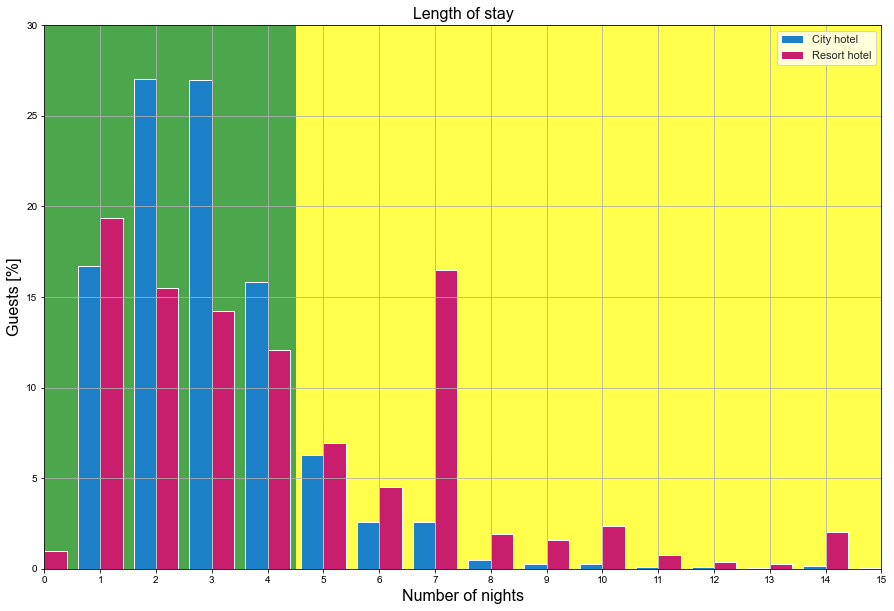

In [21]:
# Create a DateFrame with the relevant data:
df_rh["total_nights"] = df_rh["stays_in_weekend_nights"] + df_rh["stays_in_week_nights"]
df_ch["total_nights"] = df_ch["stays_in_weekend_nights"] + df_ch["stays_in_week_nights"]


num_nights_res = list(df_rh["total_nights"].value_counts().index)
num_bookings_res = list(df_rh["total_nights"].value_counts())
rel_bookings_res = df_rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)


# Plotting
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1,1,1)

# ## axes1
# ax1.axvspan(0, 4.5, facecolor='green', alpha=0.7)
# ax1.axvspan(4.5, 22, facecolor='yellow', alpha=0.7)
# sns.set(style='white')
# sns.barplot(x = "num_nights", y = "rel_num_bookings", 
#             hue="hotel", data=nights_data,
#             hue_order = ["City hotel", "Resort hotel"], ax = ax1)
# ax1.set_xlim([0,15])
# ax1.set_ylim([0,30])

# ax1.grid()
# ax1.margins(0) # remove default margins (matplotlib verision 2+)



## axes2
ax1.axvspan(0, 4.5, facecolor='green', alpha=0.7)
ax1.axvspan(4.5, 22, facecolor='yellow', alpha=0.7)
sns.set(style='white')
sns.barplot(x = "num_nights", y = "rel_num_bookings", 
            hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"], ax = ax1,
            palette = ['#0086e6','#e6006b'])

ax1.set_xlim([0,15])
ax1.set_ylim([0,30])

ax1.grid()
ax1.margins(0) # remove default margins (matplotlib verision 2+)


###
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")

plt.show()

# 중요 스택그래프 진행중

# 단순 카운트

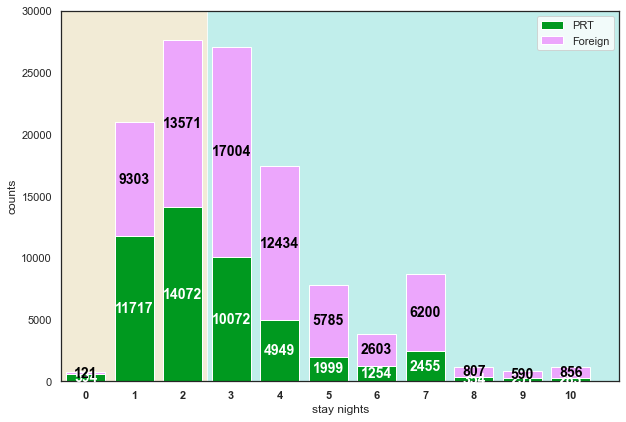

In [22]:
df = df_ht
df.loc[df['country'] !='PRT', 'country'] ='foreign'

  #
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df = df[['country','total_nights']]

'''
'''
grouped_df = df.groupby(['total_nights', 'country']
                          ).size().reset_index(name="Count")[0:22]

'''
'''

'''X생성:
    차트 x축을 담당할 total_nights에 존재하는 값을 유일하게 확인: set이용'''

x_totalNights = grouped_df['total_nights'][::2].values

'''PRT,foreign,s3 구성:
    차트의 stacked bar를 구성할 값들'''

s1_PRT = grouped_df['Count'][0::2].values
s2_foreign = grouped_df['Count'][1::2].values  


'''Setting colors'''
colors = ['#00991f','#eca6fc']

'''The position of the bars
    on the x-axis'''
r = range(len(x_totalNights))
# barWidth = 1

'''plot bars'''
fig = plt.figure(figsize=(10,15))
ax_back = fig.add_subplot(2,1,1)
ax_back.axvspan(-0.5, 2.5, facecolor='#ede3c5', alpha=0.7)
ax_back.axvspan(2.5, 20, facecolor='#a7e7e3', alpha=0.7)

ax1 = plt.bar(r, s1_PRT, color=colors[0], edgecolor='white',
            #   width=barWidth,
              label="PRT")
ax2 = plt.bar(r, s2_foreign, bottom=np.array(s1_PRT), color=colors[1], edgecolor='white',
            #   width=barWidth,
              label='Foreign')


plt.legend()

# Custom X axis
plt.xticks(r, x_totalNights, fontweight='bold')
plt.xlabel('stay nights')
plt.ylabel("counts")

ax_back.set_xlim([-0.5,11])
ax_back.set_ylim([0,30000])

'''###'''
# fig = plt.figure(figsize=(19,20))
# ax3 = fig.add_subplot(2,1,1)

# # axes1
# ax1.axvspan(0, 4.5, facecolor='green', alpha=0.7)
# ax1.axvspan(4.5, 22, facecolor='yellow', alpha=0.7)
'''###'''

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="black", fontsize=14, fontweight="bold")
plt.show()

# 비율

[83.07692308 55.74215033 50.90619687 37.19899542 28.47034459 25.68088386
 32.51231527 28.36510687 30.49095607 29.84542212 24.84635645]
[16.92307692 44.25784967 49.09380313 62.80100458 71.52965541 74.31911614
 67.48768473 71.63489313 69.50904393 70.15457788 75.15364355]


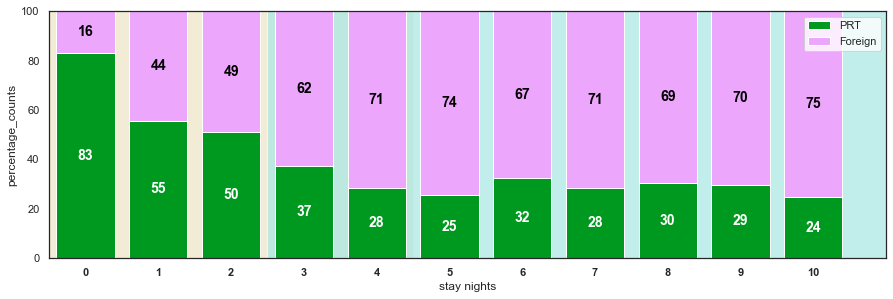

In [23]:
df = df_ht
df.loc[df['country'] !='PRT', 'country'] ='foreign'

  #
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df = df[['country','total_nights']]

'''
'''
grouped_df = df.groupby(['total_nights', 'country']
                          ).size().reset_index(name="Count")[0:22]

'''
'''

'''X생성:
    차트 x축을 담당할 total_nights에 존재하는 값을 유일하게 확인: set이용'''

x_totalNights = grouped_df['total_nights'][::2].values 

'''PRT,foreign,s3 구성:
    차트의 stacked bar를 구성할 값들'''

s1_PRT = grouped_df['Count'][0::2].values
s2_foreign = grouped_df['Count'][1::2].values  

tot_s = s1_PRT + s2_foreign

s1_ratio = s1_PRT / tot_s * 100
s2_ratio = s2_foreign / tot_s * 100

print(s1_ratio)
print(s2_ratio)
#####

'''Setting colors'''
colors = ['#00991f','#eca6fc']

'''The position of the bars
    on the x-axis'''
r = range(len(x_totalNights))
# barWidth = 1

'''plot bars'''
fig = plt.figure(figsize=(15,10))
ax_back = fig.add_subplot(2,1,1)
ax_back.axvspan(-0.5, 4.5, facecolor='#ede3c5', alpha=0.7)
ax_back.axvspan(2.5, 20, facecolor='#a7e7e3', alpha=0.7)

ax1 = plt.bar(r, s1_ratio, color=colors[0], edgecolor='white',
            #   width=barWidth,
              label="PRT")
ax2 = plt.bar(r, s2_ratio, bottom=np.array(s1_ratio), color=colors[1], edgecolor='white',
            #   width=barWidth,
              label='Foreign')


plt.legend()

# Custom X axis
plt.xticks(r, x_totalNights, fontweight='bold')
plt.xlabel('stay nights')
plt.ylabel("percentage_counts")

ax_back.set_xlim([-0.5,11])
ax_back.set_ylim([0,100])

'''###'''
# fig = plt.figure(figsize=(19,20))
# ax3 = fig.add_subplot(2,1,1)

# # axes1
# ax1.axvspan(0, 4.5, facecolor='green', alpha=0.7)
# ax1.axvspan(4.5, 22, facecolor='yellow', alpha=0.7)
'''###'''

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="black", fontsize=14, fontweight="bold")
plt.show()

투숙객이 머무른 날의 수에 따른 내국인과 외국인의 백분율 변화를 0일~10일까지 보여준 그래프 입니다.

0일,1일,2일 숙박한 투숙팀의 경우 포르투갈(내국인) 투숙팀의 비율이 높았으며

3일차가 지나고부터는 외국인 투숙팀이 압도적으로 높아지는 유의미한 백분율 변화를 보여주었습니다.
<br>

**마케팅 제안**

    - 내국인 고객의 




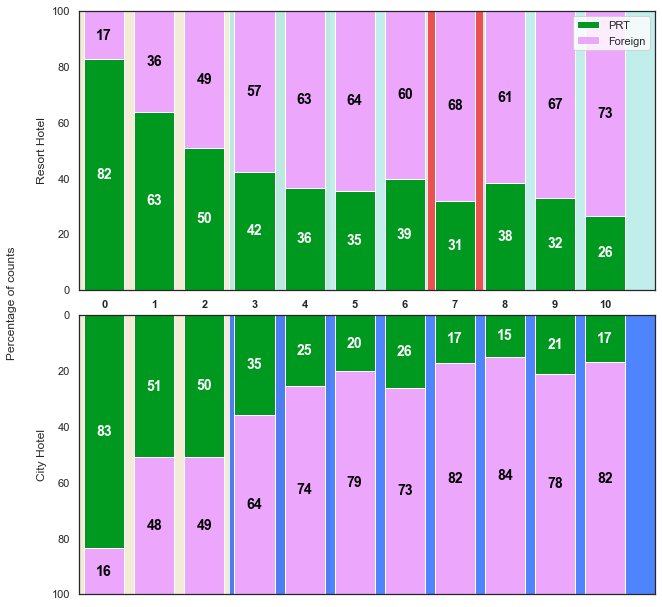

In [31]:
df = df_ht
df.loc[df['country'] !='PRT', 'country'] ='foreign'

  #
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df = df[['hotel','country','total_nights']]

'''
'''
grouped_df = df.groupby(['total_nights','hotel', 'country']
                          ).size().reset_index(name="Count")[0:44]

grouped_RH = grouped_df[grouped_df['hotel']=='Resort Hotel'].reset_index()
grouped_CH = grouped_df[grouped_df['hotel']=='City Hotel'].reset_index()


'''X생성:
    차트 x축을 담당할 total_nights에 존재하는 값을 유일하게 확인: set이용'''

# RH
x_totalNights_RH = grouped_RH['total_nights'][::2].values
# CH
x_totalNights_CH = grouped_RH['total_nights'][::2].values

'''PRT,foreign,s3 구성:
    차트의 stacked bar를 구성할 값들'''
# RH
s1_PRT_RH = grouped_RH['Count'][0::2].values
s2_foreign_RH = grouped_RH['Count'][1::2].values  
# CH
s1_PRT_CH = grouped_CH['Count'][0::2].values
s2_foreign_CH = grouped_CH['Count'][1::2].values  

# RH
tot_s_RH = s1_PRT_RH + s2_foreign_RH
# CH
tot_s_CH = s1_PRT_CH + s2_foreign_CH

# RH
s1_ratio_RH = s1_PRT_RH / tot_s_RH * 100
s2_ratio_RH = s2_foreign_RH / tot_s_RH * 100
# CH
s1_ratio_CH = s1_PRT_CH / tot_s_CH * 100
s2_ratio_CH = s2_foreign_CH / tot_s_CH * 100

#####

'''Setting colors'''
colors = ['#00991f','#eca6fc']

'''The position of the bars
    on the x-axis'''
# RH
RH_r = range(len(x_totalNights_RH))
# CH
CH_r = range(len(x_totalNights_CH))


''''''''''''''''''''''''
'''plot bars'''
fig = plt.figure(figsize=(20,9))
ax_back = fig.add_subplot(2,1,1)
ax_back.axvspan(-0.5, 4.5, facecolor='#ede3c5', alpha=0.7)
ax_back.axvspan(2.5, 20, facecolor='#a7e7e3', alpha=0.7)
ax_back.axvspan(6.45, 7.57, facecolor='#ff0f0f', alpha=0.7)

fig.text(0.45, 0.45, 'Percentage of counts', va='center', rotation='vertical')

plt.subplots_adjust(left=0.5, bottom=0.0, right=0.9, top=0.9, wspace=0.1, hspace=0.09)

'''
# 1 - RH_PLOT
'''
plt_RH = plt.subplot(2,1,1)

# ax_back = fig.add_subplot(2,1,1)
# ax_back.axvspan(-0.5, 4.5, facecolor='#ede3c5', alpha=0.7)
# ax_back.axvspan(2.5, 20, facecolor='#a7e7e3', alpha=0.7)

ax1_RH = plt_RH.bar(r, s1_ratio_RH, color=colors[0], edgecolor='white',
            #   width=barWidth,
              label="PRT")

ax2_RH = plt_RH.bar(r, s2_ratio_RH, bottom=np.array(s1_ratio_RH), color=colors[1], edgecolor='white',
            #   width=barWidth,
              label='Foreign')

# ax1_RH[7].set_color('gold') #######
# ax2_RH[7].set_color('red') #######

plt.legend()

# Custom X axis
plt.xticks(RH_r, x_totalNights_RH, fontweight='bold')
plt.ylabel("Resort Hotel")

ax_back.set_xlim([-0.5,11])
ax_back.set_ylim([0,100])

'''###'''
# fig = plt.figure(figsize=(19,20))
# ax3 = fig.add_subplot(2,1,1)

# # axes1
# ax1_RH.axvspan(0, 4.5, facecolor='green', alpha=0.7)
# ax1_RH.axvspan(4.5, 22, facecolor='yellow', alpha=0.7)
'''###'''

for r1, r2 in zip(ax1_RH, ax2_RH):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt_RH.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt_RH.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="black", fontsize=14, fontweight="bold")
    

'''
# 2 - CH PLOT 
'''
ax_back = fig.add_subplot(2,1,2)
ax_back.axvspan(-0.5, 4.5, facecolor='#ede3c5', alpha=0.7)
ax_back.axvspan(2.5, 20, facecolor='#0550ff', alpha=0.7)

plt_CH = plt.subplot(2,1,2)

plt_CH.axes.xaxis.set_visible(False)
plt.axis([-0.5,11,100,0])
ax_back.set_xlim([-0.5,11])
ax_back.set_ylim([0,100])

# ax_back = fig.add_subplot(2,1,1)
# ax_back.axvspan(-0.5, 4.5, facecolor='#ede3c5', alpha=0.7)
# ax_back.axvspan(2.5, 20, facecolor='#a7e7e3', alpha=0.7)

ax1_CH = plt_CH.bar(r, s1_ratio_CH, color=colors[0], edgecolor='white',)
ax2_CH = plt_CH.bar(r, s2_ratio_CH, bottom=np.array(s1_ratio_CH), color=colors[1], edgecolor='white',)


# Custom X axis
plt.xticks(CH_r, x_totalNights_CH, fontweight='bold')
plt.yticks([0,20,40,60,80,100])
plt.xlabel("Stay Nights")
plt.ylabel("City Hotel")

ax_back.set_xlim([-0.5,11])
ax_back.set_ylim([100,0])

'''###'''

for r1, r2 in zip(ax1_CH, ax2_CH):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt_CH.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=14, fontweight="bold")
    plt_CH.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="blacK", fontsize=14, fontweight="bold")

plt.show()

In [25]:
# STACKED BAR PLOT 만드는 법 
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 전처리 제안

In [26]:
# null값 0 이상인 컬럼
df_ht.isnull().sum()[df_ht.isnull().sum() > 0]

    # 1. children, country는 결측 레코드를 제외하는 것으로 처리한다.
    # 2. agent는 필요에 따라 컬럼을 제외하는 등의 방안을 고려한다 -> 논의 필요
    # 3. company 컬럼은 총 119390 레코드 중 112593개의 결측값을 가지고 있으므로 company 컬럼은 제외하는것이 바람직하다.

children         4
agent        16340
company     112593
dtype: int64

# 시계열 분석

# 시계열 분석

# 위치기반 분석